In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab1_Files/'
filename_Day = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab1_Files/day.jpg'
filename_Night = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab1_Files/night.jpg'
filename_Test = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab1_Files/test.jpg'

 day.jpg      lab1.py			 night.jpg     test.jpg
 Lab1.ipynb  'Lab1_Template (1).ipynb'	 part3.ipynb   Untitled0.ipynb


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


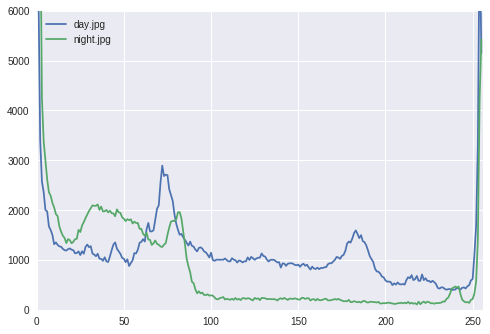

The Bahattacharya Coefficient is: 0.8669073152345631


In [0]:
#Your Code 
import numpy as np
from skimage import io, exposure, img_as_ubyte
import matplotlib.pyplot as plt
import math


#write a program to compare histograms of two images day and night, convert to
#gray scale, compute their histograms and print the Bhattacharyya coefficient

def main():
    dayIn = img_as_ubyte(io.imread(filename_Day, as_grey=True))
    nightIn = img_as_ubyte(io.imread(filename_Night, as_grey=True))
#     testIn = img_as_ubyte(io.imread(filename_Test, as_grey=True))
    
    dayHist = builtinHist(dayIn)
    #dayHist = myhist(dayIn)
    nightHist = builtinHist(nightIn)
    #nightHist = myhist(nightIn)
#     testHist = builtinHist(testIn)
    
    plt.legend(('day.jpg','night.jpg'), loc=2)
    plt.show()
    BC(dayHist[0], nightHist[0])
   

def builtinHist(IMG):
    A = exposure.histogram(IMG, nbins=256)
    plt.xlim(0,256)
    plt.ylim(0,6000)
    plt.plot(A[0])
    return A

#Bhattacharya coefficient
def BC(hist1, hist2):
    #normalize the histogram
    hist1 = normalize(hist1)
    hist2 = normalize(hist2)
    sm = 0
    for i in range(len(hist1)):
        sm+=math.sqrt((hist1[i]*hist2[i]))
    print("The Bahattacharya Coefficient is:",sm)
    
def normalize(hist):
    #divide each histogram by the sum of all its entries
    #sumCum= np.cumsum(hist)
    sc = 0
    for i in hist:
        sc+=i
    normHist = np.zeros(256)
    for i in range(len(normHist)):
        normHist[i] = hist[i]/sc
      
    return normHist

main()
